In [2]:
import requests
import pandas as pd


BASE_URL = "https://api.nb.no/ngram/db2"
BASE_URL1 = "https://api.nb.no/ngram/db1"

pd.options.display.max_rows = 100

In [318]:
def ngram_book(word = ['.'], title = None, period = None, publisher = None, lang=None, city = None, ddk = None, topic = None):
    """Get a time series for a word as string, title is name of book period is (year, year), lang is three letter iso code.
    Use % as wildcard where appropriate - no wildcards in word and lang"""
    params = locals()
    if isinstance(word, str):
        # assume a comma separated string
        word = [w.strip() for w in word.split(',')]
    params['word'] = tuple(word)
    params = {x:params[x] for x in params if not params[x] is None}
    r = requests.post(BASE_URL1 + "/ngram_book", json = params)
    df = pd.DataFrame.from_dict(r.json(), orient = 'index')
    df.index = df.index.map(lambda x: tuple(x.split()))
    columns = df.index.levels[0]
    df = pd.concat([df.loc[x] for x in columns], axis = 1)
    df.columns = columns 
    df.index = df.index.map(pd.Timestamp)
    return df

def ngram_news(word = ['.'], title = None, period = None):
    """ get a time series period is a tuple of (year, year), (yearmonthday, yearmonthday) 
    word is string and title is the title of newspaper, use % as wildcard"""
    params = locals()
    if isinstance(word, str):
        # assume a comma separated string
        word = [w.strip() for w in word.split(',')]
    params['word'] = tuple(word)
    params = {x:params[x] for x in params if not params[x] is None}
    r = requests.post(BASE_URL1 + "/ngram_newspapers", json = params)
    df = pd.DataFrame.from_dict(r.json(), orient = 'index')
    df.index = df.index.map(lambda x: tuple(x.split()))
    columns = df.index.levels[0]
    df = pd.concat([df.loc[x] for x in columns], axis = 1)
    df.columns = columns
    df.index = df.index.map(pd.Timestamp)
    return df

In [312]:
%%time
data = ngram_news(word = ('gull', 'sølv', 'bronse'), period = (19940201, 19940305))


Wall time: 257 ms


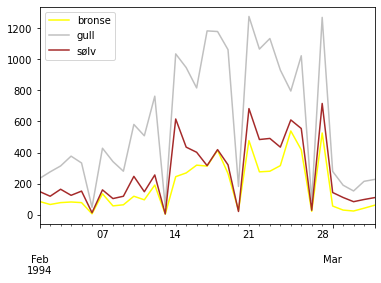

In [314]:
data.plot(color =['yellow','silver', 'brown'])

In [328]:
%%time
data = ngram_book(word = ('gull', 'sølv', 'bronse'), ddk = "8%", period = (1994, 1999))
data

Wall time: 221 ms


,bronse,gull,sølv
1994-01-01,301,5938,2510
1995-01-01,298,5751,2334
1996-01-01,337,5937,3070
1997-01-01,236,5491,2609
1998-01-01,258,5852,2673
1999-01-01,309,5533,2259


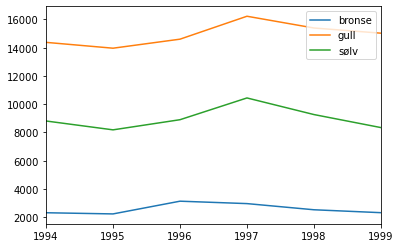

In [320]:
data.plot()

In [270]:
from collections import Counter

In [271]:
dataa = [tuple(x[0].split()) + (x[1],) for x in Counter(data).most_common()]

In [289]:
df = pd.DataFrame.from_dict(data, orient = 'index')
df.index = df.index.map(lambda x: tuple(x.split()))
dfr = pd.concat([df.loc[x] for x in df.index.levels[0]], axis = 1)
dfr.columns = df.index.levels[0]
dfr

,din,hans,min
1950,35908,173741,82957
1951,22839,135681,57211
1952,23692,123619,53117
1953,24788,130014,62446
1954,22535,114427,64281
1955,27144,109279,62815
1956,20176,96644,49520
1957,25863,122042,61820
1958,29672,137003,66903
1959,30358,159863,66443


In [284]:
df.index.levels

FrozenList([['din', 'hans', 'min'], ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']])

In [287]:
dfr = pd.concat([df.loc[x] for x in df.index.levels[0]], axis = 1)
dfr.columns = df.index.levels[0]

In [288]:
dfr

,din,hans,min
1950,35908,173741,82957
1951,22839,135681,57211
1952,23692,123619,53117
1953,24788,130014,62446
1954,22535,114427,64281
1955,27144,109279,62815
1956,20176,96644,49520
1957,25863,122042,61820
1958,29672,137003,66903
1959,30358,159863,66443


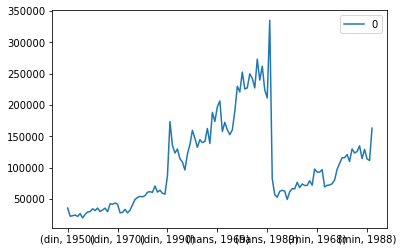

In [279]:
df.plot()

In [266]:
df  = pd.DataFrame({z[0]:{n[1]:z[2] for n in data if n[1] == z[1]} for z in data})
df

,hans,min,din
1956,96644,49520,20176


In [56]:
period = (1950, 2021)
ddk = "839%"

In [234]:
punkts = pd.DataFrame(pd.concat([ngram_book(word = x, period = period) for x in ". ,".split()], axis = 1).sum(axis = 1), columns = ['freq'])
lik = ngram_book( word = 'likestilling', period = period)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

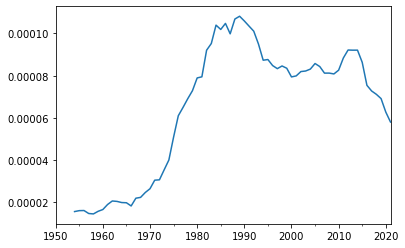

In [226]:
(lik.likestilling/punkts.freq).rolling(window = 5).mean().plot()

In [227]:
p = (19450101, 19451010)
punktsn = pd.DataFrame(pd.concat([ngram_news(word = x, period = p) for x in ". ,".split()], axis = 1).sum(axis = 1), columns = ['freq'])
likn = ngram_news( word = 'krigen',period = p)

In [228]:
likn

,krigen
1945-01-02,512
1945-01-03,450
1945-01-04,269
1945-01-05,318
1945-01-06,343
...,...
1945-10-05,1569
1945-10-06,1740
1945-10-08,912
1945-10-09,1104


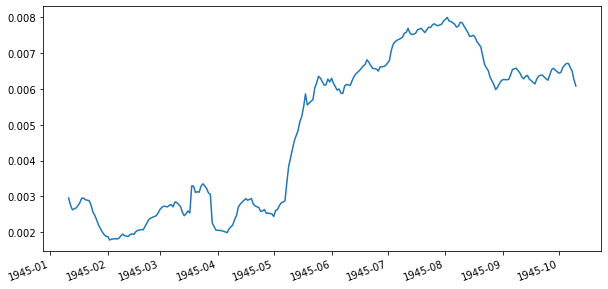

In [229]:
(likn[likn.columns[0]]/punktsn.freq).rolling(window = 10).mean().plot(rot = 20, figsize = (10,5))

In [165]:
%%time
(pd.DataFrame(pd.concat([ngram_book(word = w, period = (2015, 2021)) for w in ". og i".split()], axis = 1).sum(axis = 1), columns = ['antall bøker'])/5000).applymap(int).loc[::-1]

Wall time: 588 ms


,antall bøker
2021,493
2020,2544
2019,3498
2018,4498
2017,5956
2016,6995
2015,9998


In [172]:
%%time
(pd.DataFrame(pd.concat([ngram_news(word = w, period = (2015, 2016)) for w in ". og i".split()], axis = 1).sum(axis = 1), columns = ['antall aviser'])/5000).applymap(int).loc[::-1]

Wall time: 919 ms


,antall aviser
2016,19428
2015,20770
